In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import sys
import pandas as pd

sys.path.append('../../../param_search')
import param_search as ps

ps.set_verbose(False)
ps.set_backend('slurm')

In [3]:
csv_path = '2025-11-02_selected.csv'
sel = pd.read_csv(csv_path)
sel

,subject,metadata.category.set,metadata.category.len,metadata.category.set_f,metadata.category.len_f,metadata.category.valid,metadata.category.reasons,metadata.unit.value,metadata.unit.valid,metadata.unit.reasons,...,artifacts.valid,artifacts.reasons,valid,reasons,artifacts.scene.exc,paths.source_mask.exc,source_path,job_name,job_id,dims_error
0,wss.100f39dce7690f59efb94709f30ce0d2,"{'Recliner', 'Chair'}",2,"{'Recliner', 'Chair'}",2,True,(),0.012947,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,7.294375e-08
1,wss.101354f9d8dede686f7b08d9de913afe,"{'Speaker', '_Attributes'}",2,{'Speaker'},1,True,(),0.013620,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,1.319075e-08
2,wss.1029fd5d71a06ea32ea98d69e91ba870,{'ChestOfDrawers'},1,{'ChestOfDrawers'},1,True,(),0.019631,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,8.319422e-08
3,wss.102a6b7809f4e51813842bc8ef6fe18,"{'Desktop', 'Computer'}",2,"{'Desktop', 'Computer'}",2,True,(),0.025252,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,1.077898e-07
4,wss.107637b6bdf8129d4904d89e9169817b,{'Couch'},1,{'Couch'},1,True,(),0.022625,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,7.520307e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,wss.d81f943065391492a7e760c0b399301,"{'FoodItem', 'Bowl', '_StanfordSceneDBModels',...",4,"{'FoodItem', 'Bowl', 'FruitBowl'}",3,True,(),0.001381,True,(),...,True,(),False,"('missing dims',)",NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,5c023e2f832d4dcf,35732849,NaN
1112,wss.d8d4004791c4f61b80fa98b5eeb7036c,"{'_StanfordSceneDBModels', 'Book'}",2,{'Book'},1,True,(),0.000002,True,(),...,True,(),False,"('missing dims',)",NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,5c023e2f832d4dcf,35732849,NaN
1113,wss.e8add7acb28e2505fd40810f48721e8b,"{'Bed', 'DoubleBed'}",2,"{'Bed', 'DoubleBed'}",2,True,(),0.009245,True,(),...,True,(),False,"('missing dims',)",NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,5c023e2f832d4dcf,35732849,NaN
1114,wss.f6420a3a3addd027f67be63aca8832dd,"{'Recliner', 'Chair'}",2,"{'Recliner', 'Chair'}",2,True,(),0.027262,True,(),...,True,(),False,"('missing dims',)",NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,8786de37533664e5,35732850,NaN


In [4]:
base_dir = '2025-11-04_optimize'

template = '''\
#!/bin/bash -l
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -t 24:00:00
set -eo pipefail

LP=$PROJECT/lung-project
NB=$PROJECT/lung-project/notebooks/shapenet

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/optimize.py --dataset shapenet --data_root $LP/data/ShapeNetSem --variant {variant} --config $NB/{config} --subject {subject} --output {output_path}

'''
name_format = '{params_hash}'

grid = ps.param_grid(subject=sel.subject, variant='2025-11-02', config='2025-11-02_config.json')
len(grid)

1116

In [5]:
base_dir = '2025-11-06_optimize'

template = '''\
#!/bin/bash -l
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -t 24:00:00
set -eo pipefail

LP=$PROJECT/lung-project
NB=$PROJECT/lung-project/notebooks/shapenet

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/optimize.py --dataset shapenet --data_root $LP/data/ShapeNetSem --variant {variant} --config $NB/{config} --subject {subject} --output {output_path}

'''
name_format = '{params_hash}'

grid = ps.param_grid(subject=sel.subject, variant='2025-11-02', config='2025-11-05_config.json')
len(grid)

1116

In [6]:
base_dir = '2025-11-08_optimize' # fixed node labeling- use cell labels as GT, map cell -> point data, P0 scalars in forward sim

template = '''\
#!/bin/bash -l
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -t 24:00:00
set -eo pipefail

LP=$PROJECT/lung-project
NB=$PROJECT/lung-project/notebooks/shapenet

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/optimize.py --dataset shapenet --data_root $LP/data/ShapeNetSem --variant {variant} --config {config} --subject {subject} --output {output_path}

'''
name_format = '{params_hash}'

grid = ps.param_grid(subject=sel.subject, variant='2025-11-02', config='2025-11-05_config.json')
len(grid)

1116

In [4]:
base_dir = '2025-11-24_optimize' # post CVPR- new material catalog, rho known experiment

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/optimize.py {config} \\
    --set dataset.examples.subjects={subject} \\
    --set optimization.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(subject=sel.subject, rho_known=[True, False], variant='2025-11-20', config='2025-11-20_config.yaml')
len(grid)

2232

In [20]:
%autoreload
try:
    jobs = ps.setup(base_dir, template, name_format, grid, overwrite=False)
except OSError:
    jobs = ps.load(base_dir)

jobs

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params.variant,params.config,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
0,f65ba25783218521,COMPLETED,1,36199254,v011,00:02:39,u_cell.rms 0....,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2025-12-01T11:19:34,True,814,1.764030e+09
1,f0adc571d86995ba,COMPLETED,1,36199255,v011,00:02:39,u_cell.rms 0....,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2025-12-01T11:19:34,True,858,1.764030e+09
2,626973dc58561bdc,COMPLETED,1,36199256,v003,00:02:42,u_cell.rms 0....,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2025-12-01T11:19:34,True,816,1.764030e+09
3,484d9e6ae2d1226c,COMPLETED,1,36199257,v003,00:02:42,u_cell.rms 0....,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2025-12-01T11:19:34,True,868,1.764030e+09
4,a1d832eaf3742fe3,COMPLETED,1,36199258,v009,00:02:27,u_cell.rms 0....,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2025-12-01T11:19:34,True,822,1.764030e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,62c33152167c7027,COMPLETED,1,36201482,v021,00:00:22,u_cell.rms 0....,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2025-12-01T11:19:34,True,806,1.764047e+09
2228,f9361305b7cbbfc1,COMPLETED,1,36201483,w006,00:00:12,u_cell.rms 0....,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2025-12-01T11:19:34,True,752,1.764047e+09
2229,0126e3216fddf656,COMPLETED,1,36201484,w004,00:02:38,u_cell.rms 0....,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2025-12-01T11:19:34,True,813,1.764047e+09
2230,c4e42071f7daa730,COMPLETED,1,36201485,w004,00:02:33,u_cell.rms 0....,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2025-12-01T11:19:34,True,820,1.764047e+09


In [21]:
%autoreload
jobs = ps.recover(jobs)
jobs = ps.status(jobs)
jobs = ps.history(jobs)
jobs.groupby(['job_state']).count()

,job_name,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,script_path,...,params.variant,params.config,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
job_state,,,,,,,,,,,,,,,,,,,,,
COMPLETED,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,...,2232,2232,0,0,2232,2232,2232,2232,2232,2232


In [22]:
jobs = ps.collect(jobs)

In [8]:
jobs[jobs.job_state == 'FAILED'].iloc[1]

IndexError: single positional indexer is out-of-bounds

In [9]:
print(jobs[jobs.job_state == 'FAILED'].iloc[1].stderr)

IndexError: single positional indexer is out-of-bounds

In [10]:
jobs.loc[:, 'job_id'] = pd.NA

In [48]:
jobs = ps.submit(jobs)

In [24]:
%autoreload
df = ps.outputs(jobs, output_name='outputs/optimize/metrics.csv')
df

,epoch,phase,batch,loss,subject,rho_cell.mean,rho_cell.rms,rho_cell.rmse,rho_cell.nrmse,rho_cell.srmse,...,variant,method,source_path,job_name,job_id,params_hash,params.subject,params.rho_known,params.variant,params.config
0,0,optimize,0,4.376200e-05,wss.100f39dce7690f59efb94709f30ce0d2,500.000000,500.000000,0.000000,0.000000,NaN,...,2025-11-20,optimize,/ocean/projects/asc170022p/mtragoza/lung-proje...,f65ba25783218521,36199254,f65ba25783218521,wss.100f39dce7690f59efb94709f30ce0d2,True,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...
1,0,optimize,0,5.398825e-04,wss.100f39dce7690f59efb94709f30ce0d2,560.323617,571.850041,129.185345,0.258371,NaN,...,2025-11-20,optimize,/ocean/projects/asc170022p/mtragoza/lung-proje...,f0adc571d86995ba,36199255,f0adc571d86995ba,wss.100f39dce7690f59efb94709f30ce0d2,False,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...
2,0,optimize,0,2.889456e-05,wss.101354f9d8dede686f7b08d9de913afe,500.000000,500.000000,0.000000,0.000000,NaN,...,2025-11-20,optimize,/ocean/projects/asc170022p/mtragoza/lung-proje...,626973dc58561bdc,36199256,626973dc58561bdc,wss.101354f9d8dede686f7b08d9de913afe,True,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...
3,0,optimize,0,1.405273e-04,wss.101354f9d8dede686f7b08d9de913afe,550.067639,559.374311,113.278334,0.226557,NaN,...,2025-11-20,optimize,/ocean/projects/asc170022p/mtragoza/lung-proje...,484d9e6ae2d1226c,36199257,484d9e6ae2d1226c,wss.101354f9d8dede686f7b08d9de913afe,False,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...
4,0,optimize,0,4.534794e-05,wss.1029fd5d71a06ea32ea98d69e91ba870,500.000000,500.000000,0.000000,0.000000,NaN,...,2025-11-20,optimize,/ocean/projects/asc170022p/mtragoza/lung-proje...,a1d832eaf3742fe3,36199258,a1d832eaf3742fe3,wss.1029fd5d71a06ea32ea98d69e91ba870,True,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,0,optimize,0,3.160890e-04,wss.e8add7acb28e2505fd40810f48721e8b,542.457584,550.844635,104.748402,0.209497,NaN,...,2025-11-20,optimize,/ocean/projects/asc170022p/mtragoza/lung-proje...,62c33152167c7027,36201482,62c33152167c7027,wss.e8add7acb28e2505fd40810f48721e8b,False,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...
2228,0,optimize,0,4.059886e-08,wss.f6420a3a3addd027f67be63aca8832dd,500.000000,500.000000,0.000000,0.000000,NaN,...,2025-11-20,optimize,/ocean/projects/asc170022p/mtragoza/lung-proje...,f9361305b7cbbfc1,36201483,f9361305b7cbbfc1,wss.f6420a3a3addd027f67be63aca8832dd,True,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...
2229,0,optimize,0,1.476247e-04,wss.f6420a3a3addd027f67be63aca8832dd,521.257626,531.967416,108.313002,0.216626,NaN,...,2025-11-20,optimize,/ocean/projects/asc170022p/mtragoza/lung-proje...,0126e3216fddf656,36201484,0126e3216fddf656,wss.f6420a3a3addd027f67be63aca8832dd,False,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...
2230,0,optimize,0,2.264318e-06,wss.8826babe37996d5ba7ceedb2540a32b0,500.000000,500.000000,0.000000,0.000000,NaN,...,2025-11-20,optimize,/ocean/projects/asc170022p/mtragoza/lung-proje...,c4e42071f7daa730,36201485,c4e42071f7daa730,wss.8826babe37996d5ba7ceedb2540a32b0,True,2025-11-20,/ocean/projects/asc170022p/mtragoza/lung-proje...


In [26]:
df.describe(percentiles=[0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
epoch,2232.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
batch,2232.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
loss,2232.0,0.000161,0.000363,8.537326e-13,5.779603e-10,5.004303e-08,1.200164e-05,0.000083,0.000212,0.000541,0.000834,0.010562
rho_cell.mean,2232.0,526.570040,31.032663,4.247674e+02,4.931759e+02,5.000000e+02,5.000000e+02,500.000000,555.582656,577.934775,589.196955,605.805759
rho_cell.rms,2232.0,530.316440,34.477092,4.273447e+02,4.988009e+02,5.000000e+02,5.000000e+02,500.000000,563.159424,585.933225,597.474633,613.707074
rho_cell.rmse,2232.0,53.420003,54.784741,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,27.404651,106.916887,128.680374,137.870397,156.067924
rho_cell.nrmse,2232.0,0.106840,0.109569,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.054809,0.213834,0.257361,0.275741,0.312136
rho_cell.srmse,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rho_cell.pcorr,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rho_cell.scorr,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
sys.path.append('../..')
import project.visual.matplotlib as mpl_viz
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
nnas = df.isna().sum()
nnas[nnas > 0]

rho_cell.srmse    2232
rho_cell.pcorr    2232
rho_cell.scorr    2232
E_cell.srmse       342
E_cell.pcorr       356
E_cell.scorr       356
u_cell.nrmse         2
u_cell.srmse         2
u_cell.pcorr         2
u_cell.scorr         2
dtype: int64

In [35]:
df['has_na'] = df.isna().any(axis=1)
df['u_isna'] = df['u_cell.rms'].isna()
df['E_isna'] = df['E_cell.rms'].isna()
df['res_isna'] = df['res_cell.rms'].isna()
df['ucorr_isna'] = df['u_cell.pcorr'].isna()
df['Ecorr_isna'] = df['E_cell.pcorr'].isna()

df.groupby(['has_na', 'u_isna', 'E_isna', 'res_isna', 'ucorr_isna', 'Ecorr_isna']).count()

epoch  phase  batch  \
has_na u_isna E_isna res_isna ucorr_isna Ecorr_isna                        
True   False  False  False    False      False        1876   1876   1876   
                                         True          354    354    354   
                              True       True            2      2      2   

                                                     loss  subject  \
has_na u_isna E_isna res_isna ucorr_isna Ecorr_isna                  
True   False  False  False    False      False       1876     1876   
                                         True         354      354   
                              True       True           2        2   

                                                     rho_cell.mean  \
has_na u_isna E_isna res_isna ucorr_isna Ecorr_isna                  
True   False  False  False    False      False                1876   
                                         True                  354   
                              True       True                    2   

                                                     rho_cell.rms  \
has_na u_isna E_isna res_isna ucorr_isna Ecorr_isna                 
True   False  False  False    False      False               1876   
                                         True                 354   
                              True       True                   2   

                                                     rho_cell.rmse  \
has_na u_isna E_isna res_isna ucorr_isna Ecorr_isna                  
True   False  False  False    False      False                1876   
                                         True                  354   
                              True       True                    2   

                                                     rho_cell.nrmse  \
has_na u_isna E_isna res_isna ucorr_isna Ecorr_isna                   
True   False  False  False    False      False                 1876   
                                         True                   354   
                              True       True                     2   

                                                     rho_cell.srmse  ...  \
has_na u_isna E_isna res_isna ucorr_isna Ecorr_isna                  ...   
True   False  False  False    False      False                    0  ...   
                                         True                     0  ...   
                              True       True                     0  ...   

                                                     variant  method  \
has_na u_isna E_isna res_isna ucorr_isna Ecorr_isna                    
True   False  False  False    False      False          1876    1876   
                                         True            354     354   
                              True       True              2       2   

                                                     source_path  job_name  \
has_na u_isna E_isna res_isna ucorr_isna Ecorr_isna                          
True   False  False  False    False      False              1876      1876   
                                         True                354       354   
                              True       True                  2         2   

                                                     job_id  params_hash  \
has_na u_isna E_isna res_isna ucorr_isna Ecorr_isna                        
True   False  False  False    False      False         1876         1876   
                                         True           354          354   
                              True       True             2            2   

                                                     params.subject  \
has_na u_isna E_isna res_isna ucorr_isna Ecorr_isna                   
True   False  False  False    False      False                 1876   
                                         True                   354   
                              True       True                     2   

                                               

In [192]:
df['res_order'] = np.log10(df['res_cell.rms'])
df['u_order'] = np.log10(df['u_cell.nrmse'])
df['E_order'] = np.log10(df['E_cell.nrmse'])
df[['res_order', 'u_order', 'E_order']].describe().T

,count,mean,std,min,25%,50%,75%,max
res_order,2232.0,-0.868385,1.076625,-4.450753,-1.585058,-0.724360,0.054384,2.839144
u_order,2230.0,-2.747874,0.993206,-6.570163,-3.084074,-2.534728,-2.065929,-1.234168
E_order,2232.0,-0.997883,1.391196,-6.612360,-0.833002,-0.651150,-0.506290,2.017563


In [161]:
def classify_failure(row):
    if row['res_order'] > 2:
        return 'residual'
    elif row['E_order'] > 0:
        return 'E error hi'
    elif row['E_order'] > -2:
        return 'E error lo'
    return 'ok'

df['failure_type'] = df.apply(classify_failure, axis=1)
df['failure_type'].value_counts()

failure_type
E error lo    1988
ok             170
E error hi      70
residual         4
Name: count, dtype: int64

<Axes: xlabel='Count', ylabel='E_cell.nrmse'>

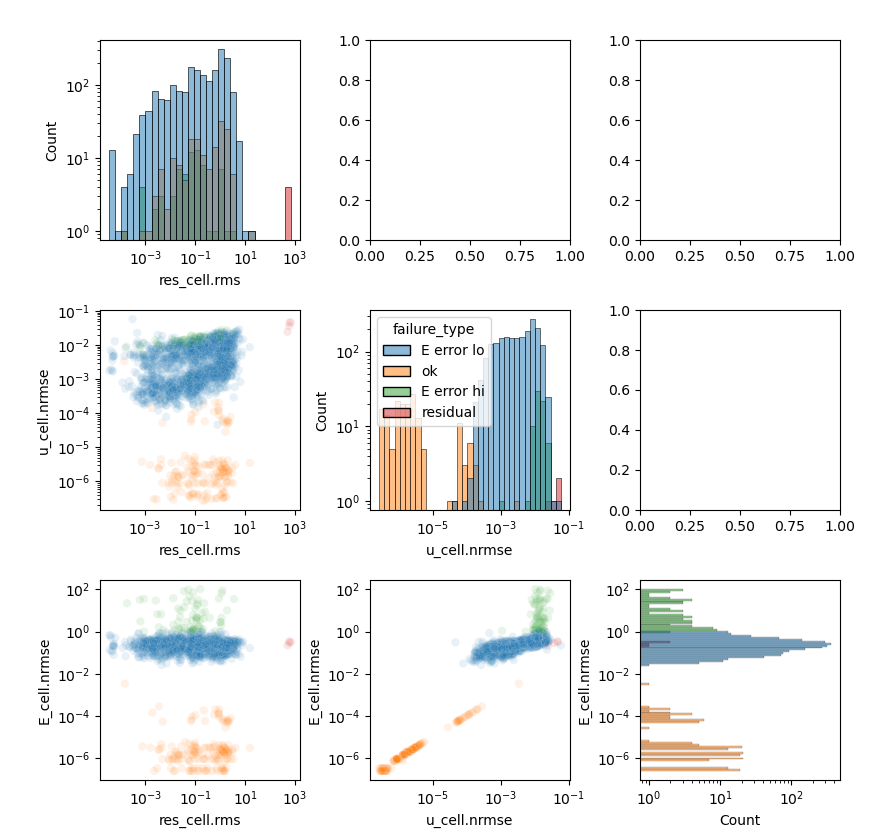

In [162]:
fig, axes = mpl_viz.subplot_grid(3, 3, ax_height=2, ax_width=2, padding=(1.0, 0.4, 0.6, 0.4), spacing=0.7) # lrbt

ax = axes[0,0]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.histplot(df, x='res_cell.rms', hue='failure_type', legend=False, ax=ax)

ax = axes[1,0]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.scatterplot(df, x='res_cell.rms', y='u_cell.nrmse', hue='failure_type', legend=False, ax=ax, alpha=0.1)

ax = axes[2,0]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.scatterplot(df, x='res_cell.rms', y='E_cell.nrmse', hue='failure_type', legend=False, ax=ax, alpha=0.1)

ax = axes[1,1]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.histplot(df, x='u_cell.nrmse', hue='failure_type', legend=True, ax=ax)

ax = axes[2,1]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.scatterplot(df, x='u_cell.nrmse', y='E_cell.nrmse', hue='failure_type', legend=False, ax=ax, alpha=0.1)

ax = axes[2,2]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.histplot(df, y='E_cell.nrmse', hue='failure_type', legend=False, ax=ax)


In [181]:
df.groupby(['params.rho_known'])[['res_cell.rms', 'u_cell.nrmse', 'E_cell.nrmse']].describe()

res_cell.rms                                           \
                        count      mean        std       min       25%   
params.rho_known                                                         
False                  1116.0  1.888442  27.342132  0.000035  0.027601   
True                   1116.0  1.630829  23.235653  0.000037  0.023968   

                                                 u_cell.nrmse            ...  \
                       50%       75%         max        count      mean  ...   
params.rho_known                                                         ...   
False             0.199733  1.209341  690.468326       1115.0  0.009215  ...   
True              0.175009  1.077263  592.848582       1115.0  0.001352  ...   

                                     E_cell.nrmse                      \
                       75%       max        count      mean       std   
params.rho_known                                                        
False             0.012066  0.046890       1116.0  1.314414  7.219812   
True              0.001752  0.058322       1116.0  0.136621  0.087565   

                                                                          
                           min       25%       50%       75%         max  
params.rho_known                                                          
False             7.403178e-02  0.253368  0.308225  0.383995  104.126837  
True              2.441406e-07  0.078069  0.149093  0.192277    0.864051  

[2 rows x 24 columns]

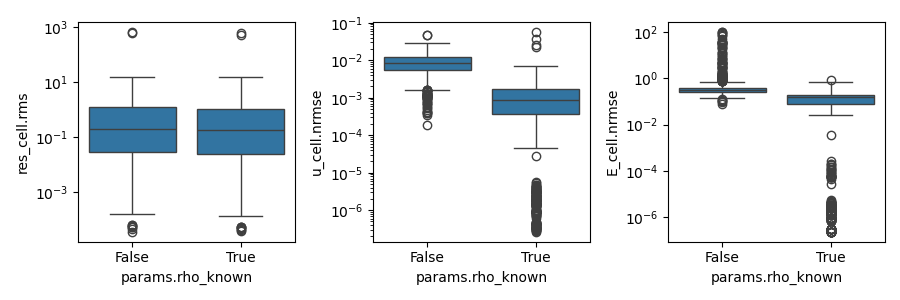

In [193]:
fig, axes = plt.subplots(1, 3, figsize=(9,3))
plot_fn = sns.boxplot
for ax in axes:
    ax.set_yscale('log')
plot_fn(df, x='params.rho_known', y='res_cell.rms', ax=axes[0])
plot_fn(df, x='params.rho_known', y='u_cell.nrmse', ax=axes[1])
plot_fn(df, x='params.rho_known', y='E_cell.nrmse', ax=axes[2])
fig.tight_layout()